# Basic AutoCorrection and BiGram AutoCorrection

In [155]:
import os
import re
import numpy as np 
import pandas as pd 
from collections import Counter
import nltk


In [67]:
with open('final.txt', 'r', encoding='utf-8') as f:
    file = f.readlines()

In [68]:
def process_data(lines):
    """
    Input: 
        A file_name which is found in your current directory. You just have to read it in. 
    Output: 
        words: a list containing all the words in the corpus (text file you read) in lower case. 
    """
    words = []        
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    
    return words

In [69]:
word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['copyright', 'laws', 'are', 'changing', 'all', 'over', 'the', 'world', 'be', 'sure']
There are 66684 unique words in the vocabulary.


<p>
    This auto-correct architecture has 4 components - <br>
 1) Filtering Mispells : One simple approach could be checking if a word is there in the vocabulary or not. <br>
2) Word Suggestion Mechanism : This mechnism suggests candidate words based on deletion, insertion, switch or replace of one/two characters in the original word. <br>
3) Probability Distribution Mechanism : The probability distribution {key(word) : value(probability)} is created calculated using a large text corpus. Probability of each candidate is found using this distribution and the most probable candidate is the final one. <br>
4) Replace Mispells : Simple replace the mispelled word with the most probable suggestion. 
</p>

### Artchitecture Part 1 : (Filtering Mispells)
<p> A function that tokenizes the sentences and checks the availability of each word in the vocabulary.

In [72]:
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

In [73]:
find_wrong_word('he is goinng home', vocab)

['goinng']

### Architecture Part 2 : (Word Suggestion Mechanism)
We'll impliment separate functions of each of the steps (deletion, insertion, switching, replace) and then combine them to edit one or two letter of the original word.

In [74]:
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words 
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''
    
    delete_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return delete_l

In [79]:
delete_word_l = delete_letter(word="cans", 
                              verbose=True)

input word : cans 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [80]:
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent charater switched
    ''' 
    
    switch_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1])>2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 

    return switch_l

In [81]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


In [82]:
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word. 
    ''' 
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    temp = l
                    replace_l.append(s[0]+temp)
        elif len(s) > 1:
            for l in letters:
                if l != s[1][0]:
                    temp = l + s[1][1:]
                    replace_l.append(s[0]+temp)
        
    replace_set = set(replace_l)
    
    # turn the set back into a list and sort it, for easier viewing
    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   
    
    return replace_l

In [83]:
replace_l = replace_letter(word='can',
                              verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [84]:
print(f"Number of outputs of switch_letter('at') is {len(switch_letter('fate'))}")

Number of outputs of switch_letter('at') is 3


In [85]:
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    ''' 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0]+l+s[1])

    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [86]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


##### Let's combine these individual steps and impliment two function for for editing on or two characters from a word.


In [87]:
def edit_one_letter(word, allow_switches = True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """
    
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
        
    edit_one_set = set(ans)

    return edit_one_set

In [88]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
#print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word : at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

Number of outputs from edit_one_letter('at') is 129


In [89]:
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word 
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''
    
    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))
        
    edit_two_set = set(ans)
    
    return edit_two_set

In [90]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


### Architecture Part 3 : (Probability Distribution)
We'll calculate the frequecies of each word using the corpus that we have. Then we'll divide each frequencies by word count to find the probabilities.

In [91]:
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus. 
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    word_count_dict = {}  
    word_count_dict = Counter(word_l)
    return word_count_dict

In [92]:
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 66684 key values pairs
The count for the word 'thee' is 28


In [93]:
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur. 
    '''
    probs = {} 
    total = 1
    for word in word_count_dict.keys():
        total = total + word_count_dict[word]
        
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word]/total
    return probs

In [94]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('you') is {probs['you']:.4f}")

Length of probs is 66684
P('you') is 0.0048


In [95]:
prob_df = pd.DataFrame({'word':probs.keys(), 'probability':probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

,word,probability
48985,interotes,8.584988e-07
37440,campains,1.716998e-06
35009,apparient,8.584988e-07
49720,lauge,8.584988e-07
36793,berrys,8.584988e-07


<Axes: xlabel='word'>

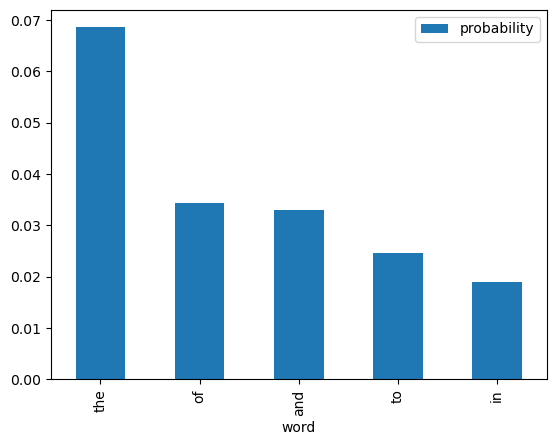

In [96]:
prob_df.head().plot.bar(x='word', y='probability')

### Architecture Part 4 : (Replace Misspells with correction)

In [97]:
def get_corrections(word, probs, vocab, n=2, verbose = False):
    '''
    Input: 
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output: 
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''
    
    suggestions = []
    n_best = []
    
   
    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
        
    best_words = {}
    
    for s in suggestions:
        best_words[s] = probs[s]
        
    best_words = sorted(best_words.items(), key=lambda x: x[1], reverse=True)
    
    n_best = best_words 
    
    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [98]:
def get_correct_word(word, vocab, probs, n): 
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
#    print(corrections)
    if len(corrections) == 0:
        return word
    
    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        #print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

In [99]:
get_correct_word('annd', vocab, probs, 100)

'and'

### DONE

In [100]:
def autocorrect(sentence, vocab, probs):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    #print(wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            #print(word, correct_word)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())


### DEMO

In [102]:
autocorrect("he is goinng home", vocab, probs)

Input sentence :  he is goinng home
Wrong words :  ['goinng']
Output Sentence :  He is going home


In [106]:
autocorrect("I seeı it", vocab, probs)

Input sentence :  I seeı it
Wrong words :  ['seeı']
Output Sentence :  I see it


In [109]:
autocorrect("life is a diink annd lve is a drrug", vocab, probs)

Input sentence :  life is a diink annd lve is a drrug
Wrong words :  ['diink', 'annd', 'lve', 'drrug']
Output Sentence :  Life is a think and love is a drug


### Improvement 1 : Introducing n-gram probabilities to get context from previous words

In [110]:
def count_n_grams(data, n, start_token='<s>', end_token = '<e>'):
    
    # Initialize dictionary of n-grams and their counts
    n_grams = {}

    
    for sentence in data: 
        
        # prepend start token n times, and  append <e> one time
        sentence = [start_token]*n + sentence + [end_token]
        sentence = tuple(sentence)
        
        for i in range(len(sentence)-n): 
            n_gram = sentence[i:i+n]
            if n_gram in n_grams.keys():
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1
    return n_grams

In [111]:
### SOME UTILITY

def split_to_sentences(data):
    #sentences = data.split("\n")
    sentences = [s.strip() for s in data]
    sentences = [s for s in sentences if len(s) > 0]
    return sentences    

def tokenize_sentences(sentences):
    tokenized_sentences = []
    for sentence in sentences:
        sentence = sentence.lower()
        tokenized = nltk.tokenize.word_tokenize(sentence)
        tokenized_sentences.append(tokenized)
    return tokenized_sentences


def get_tokenized_data(data):
    sentences = split_to_sentences(data)
    tokenized_sentences = tokenize_sentences(sentences)
    return tokenized_sentences

In [112]:
tokenized_data = get_tokenized_data(file)
bigram_counts = count_n_grams(tokenized_data, 2)

In [113]:
def get_bigram_prob(word, prev_word, bigram_counts, factor):
    key = tuple([prev_word, word])
    #print(key)  
    
    ksum = 0
    occ = 0
    for k, v in bigram_counts.items():
        if k[0] == prev_word:
            ksum = ksum + v
            occ = occ + 1
    #print(ksum)
    #print(occ)
    
    count = 0
    if key in bigram_counts.keys():
        count = bigram_counts[key]
    #print(type(occ))
    
    smooth_count = count + factor 
    smooth_occ = ksum + occ*factor
    probability = smooth_count / smooth_occ
    #print(probability)
    return probability

In [114]:
get_bigram_prob('is', 'that', bigram_counts, 1)

0.026978950489178772

In [115]:
def get_corrections_bigram(word, prev_word, probs, vocab, bigram_counts, unigram_weight=0.3, bigram_weight=0.7, n=5, verbose = False):
    '''
    Input: 
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output: 
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''
    
    suggestions = []
    n_best = []
    
   
    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
        
        
    best_words = {}
    
    for s in suggestions:
        #best_words[s] = probs[s]
        unigram_prob = probs[s]
        #print(s)
        try:
            bigram_prob = get_bigram_prob(s, prev_word, bigram_counts, 1)
        except:
            bigram_prob = 0.0000000000000000001

        final_score = unigram_weight*unigram_prob + bigram_weight*bigram_prob
        
        best_words[s] = final_score     
        
    best_words = sorted(best_words.items(), key=lambda x: x[1], reverse=True)
    
    n_best = best_words 
    
    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [116]:
def get_correct_word_bigram(word, prev_word, probs, vocab, bigram_counts, unigram_weight, bigram_weight, n): 
    corrections = get_corrections_bigram(word, prev_word, probs, vocab, 
                                         bigram_counts, unigram_weight, bigram_weight, n, verbose=False)
    #print(corrections)
    if len(corrections) == 0:
        return word
    
    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        #print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

In [117]:
def autocorrect_bigram(sentence, vocab, probs, bigram_counts):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    #print(wrong_words)
    correct_words = []
    word_list = sentence.strip().lower().split(" ")
    for i, word in enumerate(word_list):
        #print(i, word)
        
        #### Previous word
        if i==0:
            prev_word = '<s>'
        else:
            prev_word = word_list[i-1]
            
        if word in wrong_words:
            correct_word = get_correct_word_bigram(word, prev_word, probs, vocab, bigram_counts, 0.3, 0.7, 10)
            #print(word, correct_word)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

In [118]:
autocorrect_bigram('she is really beutifule', vocab, probs, bigram_counts)

Input sentence :  she is really beutifule
Wrong words :  ['beutifule']
Output Sentence :  She is really beatiful


In [119]:
autocorrect_bigram('you are not alowwed here', vocab, probs, bigram_counts)

Input sentence :  you are not alowwed here
Wrong words :  ['alowwed']
Output Sentence :  You are not allowed here


In [120]:
autocorrect_bigram('physics is the most amainzg subect', vocab, probs, bigram_counts)

Input sentence :  physics is the most amainzg subect
Wrong words :  ['amainzg', 'subect']
Output Sentence :  Physics is the most amazing subject


### Improvement 2 : Introducing min_edit_diatsnce functionality

In [132]:
def min_edit_distance(source, target, ins_cost = 1, del_cost = 1, rep_cost = 2):
    '''
    Input: 
        source: a string corresponding to the string you are starting with
        target: a string corresponding to the string you want to end with
        ins_cost: an integer setting the insert cost
        del_cost: an integer setting the delete cost
        rep_cost: an integer setting the replace cost
    Output:
        D: a matrix of len(source)+1 by len(target)+1 containing minimum edit distances
        med: the minimum edit distance (med) required to convert the source string to the target
    '''
    
    m = len(source) 
    n = len(target) 
    #initialize cost matrix with zeros and dimensions (m+1,n+1) 
    D = np.zeros((m+1, n+1), dtype=int) 
    
    for row in range(1,m+1): 
        D[row,0] = D[row-1, 0] + del_cost
        
    for col in range(1,n+1):
        D[0,col] = D[0, col-1] + ins_cost
        
    # Loop through row 1 to row m
    for row in range(1,m+1): 
        # Loop through column 1 to column n
        for col in range(1,n+1):
            # Intialize r_cost to the 'replace' cost 
            r_cost = rep_cost
            # Check to see if source character at the previous row
            # matches the target character at the previous column, 
            if source[row-1] == target[col-1]:
                # Update the replacement cost to 0 if source and target are the same
                r_cost = 0
            # Update the cost at row, col based on previous entries in the cost matrix
            D[row,col] = D[row-1][col-1] + r_cost
          
    # Set the minimum edit distance with the cost found at row m, column n
    med = D[m][n]
    
    return D, med

In [133]:
def get_correct_word_bigram_min_edit(word, prev_word, probs, vocab, bigram_counts, unigram_weight, bigram_weight, n, scale_dist): 
    corrections = get_corrections_bigram(word, prev_word, probs, vocab, 
                                         bigram_counts, unigram_weight, bigram_weight, n, verbose=False)
    #print(corrections)
    if len(corrections) == 0:
        return word
    
    ### Make a dataframe of suggestions
    words = []
    probabs = []
    dist = []
    for pair in corrections:
        words.append(pair[0])
        probabs.append(pair[1])
        _, distance = min_edit_distance(word, pair[0], 1, 1, 2)
        dist.append(distance)
        
    df = pd.DataFrame({'suggestion':words, 'distance':dist, 'probability':probabs})
    df['inv_dist'] = df['distance'].apply(lambda x : (1/x)*scale_dist)
    df['score'] = df['inv_dist'] + df['probability']
    df = df.sort_values(by='score', ascending=False)
    #df = df.sort_values(by=['distance', 'probability'], ascending=[True, False])
    #display(df)
    
    final_word = df.iloc[0,0]
    
    return final_word

In [134]:
get_correct_word_bigram_min_edit('pulicy', 'best', probs, vocab, bigram_counts, 0.3, 0.7, 10, 0.001)

'policy'

In [142]:
def autocorrect_bigram_min_edit(sentence, vocab, probs, bigram_probability_df, scale_dist=0.001):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    #print(wrong_words)
    correct_words = []
    word_list = sentence.strip().lower().split(" ")
    for i, word in enumerate(word_list):
        #print(i, word)
        
        #### Previous word
        if i==0:
            prev_word = '<s>'
        else:
            prev_word = word_list[i-1]
            
        if word in wrong_words:
            correct_word = get_correct_word_bigram_min_edit(word, prev_word, probs, vocab, bigram_probability_df, 0.3, 0.7, 25, scale_dist)
            #print(word, correct_word)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

In [143]:
autocorrect_bigram_min_edit('I have acess to the lidrary', vocab, probs, bigram_counts)

Input sentence :  I have acess to the lidrary
Wrong words :  ['lidrary']
Output Sentence :  I have acess to the library


In [144]:
autocorrect_bigram_min_edit('presnet for the meeating', vocab, probs, bigram_counts)

Input sentence :  presnet for the meeating
Wrong words :  ['presnet', 'meeating']
Output Sentence :  Present for the meaning


In [145]:
autocorrect_bigram_min_edit('he planed a game', vocab, probs, bigram_counts)

Input sentence :  he planed a game
Wrong words :  []
Output Sentence :  He planed a game


### Evaluation
Let's design a unit test for the auto-correct system that we have develpoed.

In [146]:
tests1 = {'access': 'acess',
          'accessing': 'accesing',
          'accommodation': 'accomodation acommodation acomodation',
          'account': 'acount',
          'address': 'adress adres',
          'addressable': 'addresable',
          'arranged': 'aranged arrainged',
          'arrangeing': 'aranging',
          'arrangement': 'arragment',
          'articles': 'articals',
          'aunt': 'annt anut arnt',
          'auxiliary': 'auxillary',
          'available': 'avaible',
          'awful': 'awfall afful',
          'basically': 'basicaly',
          'beginning': 'begining',
          'benefit': 'benifit',
          'benefits': 'benifits',
          'between': 'beetween',
          'bicycle': 'bicycal bycicle bycycle',
          'biscuits': 'biscits biscutes biscuts bisquits buiscits buiscuts',
          'built': 'biult',
          'cake': 'cak',
          'career': 'carrer',
          'cemetery': 'cemetary semetary',
          'centrally': 'centraly',
          'certain': 'cirtain',
          'challenges': 'chalenges chalenges',
          'chapter': 'chaper chaphter chaptur',
          'choice': 'choise',
          'choosing': 'chosing',
          'clerical': 'clearical',
          'committee': 'comittee',
          'compare': 'compair',
          'completely': 'completly',
          'consider': 'concider',
          'considerable': 'conciderable',
          'contented': 'contenpted contende contended contentid',
          'curtains': 'cartains certans courtens cuaritains curtans curtians curtions',
          'decide': 'descide',
          'decided': 'descided',
          'definitely': 'definately difinately',
          'definition': 'defenition',
          'definitions': 'defenitions',
          'description': 'discription',
          'desiccate': 'desicate dessicate dessiccate',
          'diagrammatically': 'diagrammaticaally',
          'different': 'diffrent',
          'driven': 'dirven',
          'ecstasy': 'exstacy ecstacy',
          'embarrass': 'embaras embarass',
          'establishing': 'astablishing establising',
          'experience': 'experance experiance',
          'experiences': 'experances',
          'extended': 'extented',
          'extremely': 'extreamly',
          'fails': 'failes',
          'families': 'familes',
          'february': 'febuary',
          'further': 'futher',
          'gallery': 'galery gallary gallerry gallrey',
          'hierarchal': 'hierachial',
          'hierarchy': 'hierchy',
          'inconvenient': 'inconvienient inconvient inconvinient',
          'independent': 'independant independant',
          'initial': 'intial',
          'initials': 'inetials inistals initails initals intials',
          'juice': 'guic juce jucie juise juse',
          'latest': 'lates latets latiest latist',
          'laugh': 'lagh lauf laught lugh',
          'level': 'leval',
          'levels': 'levals',
          'liaison': 'liaision liason',
          'lieu': 'liew',
          'literature': 'litriture',
          'loans': 'lones',
          'locally': 'localy',
          'magnificent': 'magnificnet magificent magnifcent magnifecent magnifiscant magnifisent magnificant',
          'management': 'managment',
          'meant': 'ment',
          'minuscule': 'miniscule',
          'minutes': 'muinets',
          'monitoring': 'monitering',
          'necessary': 'neccesary necesary neccesary necassary necassery neccasary',
          'occurrence': 'occurence occurence',
          'often': 'ofen offen offten ofton',
          'opposite': 'opisite oppasite oppesite oppisit oppisite opposit oppossite oppossitte',
          'parallel': 'paralel paralell parrallel parralell parrallell',
          'particular': 'particulaur',
          'perhaps': 'perhapse',
          'personnel': 'personnell',
          'planned': 'planed',
          'poem': 'poame',
          'poems': 'poims pomes',
          'poetry': 'poartry poertry poetre poety powetry',
          'position': 'possition',
          'possible': 'possable',
          'pretend': 'pertend protend prtend pritend',
          'problem': 'problam proble promblem proplen',
          'pronunciation': 'pronounciation',
          'purple': 'perple perpul poarple',
          'questionnaire': 'questionaire',
          'really': 'realy relley relly',
          'receipt': 'receit receite reciet recipt',
          'receive': 'recieve',
          'refreshment': 'reafreshment refreshmant refresment refressmunt',
          'remember': 'rember remeber rememmer rermember',
          'remind': 'remine remined',
          'scarcely': 'scarcly scarecly scarely scarsely',
          'scissors': 'scisors sissors',
          'separate': 'seperate',
          'singular': 'singulaur',
          'someone': 'somone',
          'sources': 'sorces',
          'southern': 'southen',
          'special': 'speaical specail specal speical',
          'splendid': 'spledid splended splened splended',
          'standardizing': 'stanerdizing',
          'stomach': 'stomac stomache stomec stumache',
          'supersede': 'supercede superceed',
          'there': 'ther',
          'totally': 'totaly',
          'transferred': 'transfred',
          'transportability': 'transportibility',
          'triangular': 'triangulaur',
          'understand': 'undersand undistand',
          'unexpected': 'unexpcted unexpeted unexspected',
          'unfortunately': 'unfortunatly',
          'unique': 'uneque',
          'useful': 'usefull',
          'valuable': 'valubale valuble',
          'variable': 'varable',
          'variant': 'vairiant',
          'various': 'vairious',
          'visited': 'fisited viseted vistid vistied',
          'visitors': 'vistors',
          'voluntary': 'volantry',
          'voting': 'voteing',
          'wanted': 'wantid wonted',
          'whether': 'wether',
          'wrote': 'rote wote'}

tests2 = {'forbidden': 'forbiden',
          'decisions': 'deciscions descisions',
          'supposedly': 'supposidly',
          'embellishing': 'embelishing',
          'technique': 'tecnique',
          'permanently': 'perminantly',
          'confirmation': 'confermation',
          'appointment': 'appoitment',
          'progression': 'progresion',
          'accompanying': 'acompaning',
          'applicable': 'aplicable',
          'regained': 'regined',
          'guidelines': 'guidlines',
          'surrounding': 'serounding',
          'titles': 'tittles',
          'unavailable': 'unavailble',
          'advantageous': 'advantageos',
          'brief': 'brif',
          'appeal': 'apeal',
          'consisting': 'consisiting',
          'clerk': 'cleark clerck',
          'component': 'componant',
          'favourable': 'faverable',
          'separation': 'seperation',
          'search': 'serch',
          'receive': 'recieve',
          'employees': 'emploies',
          'prior': 'piror',
          'resulting': 'reulting',
          'suggestion': 'sugestion',
          'opinion': 'oppinion',
          'cancellation': 'cancelation',
          'criticism': 'citisum',
          'useful': 'usful',
          'humour': 'humor',
          'anomalies': 'anomolies',
          'would': 'whould',
          'doubt': 'doupt',
          'examination': 'eximination',
          'therefore': 'therefoe',
          'recommend': 'recomend',
          'separated': 'seperated',
          'successful': 'sucssuful succesful',
          'apparent': 'apparant',
          'occurred': 'occureed',
          'particular': 'paerticulaur',
          'pivoting': 'pivting',
          'announcing': 'anouncing',
          'challenge': 'chalange',
          'arrangements': 'araingements',
          'proportions': 'proprtions',
          'organized': 'oranised',
          'accept': 'acept',
          'dependence': 'dependance',
          'unequalled': 'unequaled',
          'numbers': 'numbuers',
          'sense': 'sence',
          'conversely': 'conversly',
          'provide': 'provid',
          'arrangement': 'arrangment',
          'responsibilities': 'responsiblities',
          'fourth': 'forth',
          'ordinary': 'ordenary',
          'description': 'desription descvription desacription',
          'inconceivable': 'inconcievable',
          'data': 'dsata',
          'register': 'rgister',
          'supervision': 'supervison',
          'encompassing': 'encompasing',
          'negligible': 'negligable',
          'allow': 'alow',
          'operations': 'operatins',
          'executed': 'executted',
          'interpretation': 'interpritation',
          'hierarchy': 'heiarky',
          'indeed': 'indead',
          'years': 'yesars',
          'through': 'throut',
          'committee': 'committe',
          'inquiries': 'equiries',
          'before': 'befor',
          'continued': 'contuned',
          'permanent': 'perminant',
          'choose': 'chose',
          'virtually': 'vertually',
          'correspondence': 'correspondance',
          'eventually': 'eventully',
          'lonely': 'lonley',
          'profession': 'preffeson',
          'they': 'thay',
          'now': 'noe',
          'desperately': 'despratly',
          'university': 'unversity',
          'adjournment': 'adjurnment',
          'possibilities': 'possablities',
          'stopped': 'stoped',
          'mean': 'meen',
          'weighted': 'wagted',
          'adequately': 'adequattly',
          'shown': 'hown',
          'matrix': 'matriiix',
          'profit': 'proffit',
          'encourage': 'encorage',
          'collate': 'colate',
          'disaggregate': 'disaggreagte disaggreaget',
          'receiving': 'recieving reciving',
          'proviso': 'provisoe',
          'umbrella': 'umberalla',
          'approached': 'aproached',
          'pleasant': 'plesent',
          'difficulty': 'dificulty',
          'appointments': 'apointments',
          'base': 'basse',
          'conditioning': 'conditining',
          'earliest': 'earlyest',
          'beginning': 'begining',
          'universally': 'universaly',
          'unresolved': 'unresloved',
          'length': 'lengh',
          'exponentially': 'exponentualy',
          'utilized': 'utalised',
          'set': 'et',
          'surveys': 'servays',
          'families': 'familys',
          'system': 'sysem',
          'approximately': 'aproximatly',
          'their': 'ther',
          'scheme': 'scheem',
          'speaking': 'speeking',
          'repetitive': 'repetative',
          'inefficient': 'ineffiect',
          'geneva': 'geniva',
          'exactly': 'exsactly',
          'immediate': 'imediate',
          'appreciation': 'apreciation',
          'luckily': 'luckeley',
          'eliminated': 'elimiated',
          'believe': 'belive',
          'appreciated': 'apreciated',
          'readjusted': 'reajusted',
          'were': 'wer where',
          'feeling': 'fealing',
          'and': 'anf',
          'false': 'faulse',
          'seen': 'seeen',
          'interrogating': 'interogationg',
          'academically': 'academicly',
          'relatively': 'relativly relitivly',
          'traditionally': 'traditionaly',
          'studying': 'studing',
          'majority': 'majorty',
          'build': 'biuld',
          'aggravating': 'agravating',
          'transactions': 'trasactions',
          'arguing': 'aurguing',
          'sheets': 'sheertes',
          'successive': 'sucsesive sucessive',
          'segment': 'segemnt',
          'especially': 'especaily',
          'later': 'latter',
          'senior': 'sienior',
          'dragged': 'draged',
          'atmosphere': 'atmospher',
          'drastically': 'drasticaly',
          'particularly': 'particulary',
          'visitor': 'vistor',
          'session': 'sesion',
          'continually': 'contually',
          'availability': 'avaiblity',
          'busy': 'buisy',
          'parameters': 'perametres',
          'surroundings': 'suroundings seroundings',
          'employed': 'emploied',
          'adequate': 'adiquate',
          'handle': 'handel',
          'means': 'meens',
          'familiar': 'familer',
          'between': 'beeteen',
          'overall': 'overal',
          'timing': 'timeing',
          'committees': 'comittees commitees',
          'queries': 'quies',
          'econometric': 'economtric',
          'erroneous': 'errounous',
          'decides': 'descides',
          'reference': 'refereence refference',
          'intelligence': 'inteligence',
          'edition': 'ediion ediition',
          'are': 'arte',
          'apologies': 'appologies',
          'thermawear': 'thermawere thermawhere',
          'techniques': 'tecniques',
          'voluntary': 'volantary',
          'subsequent': 'subsequant subsiquent',
          'currently': 'curruntly',
          'forecast': 'forcast',
          'weapons': 'wepons',
          'routine': 'rouint',
          'neither': 'niether',
          'approach': 'aproach',
          'available': 'availble',
          'recently': 'reciently',
          'ability': 'ablity',
          'nature': 'natior',
          'commercial': 'comersial',
          'agencies': 'agences',
          'however': 'howeverr',
          'suggested': 'sugested',
          'career': 'carear',
          'many': 'mony',
          'annual': 'anual',
          'according': 'acording',
          'receives': 'recives recieves',
          'interesting': 'intresting',
          'expense': 'expence',
          'relevant': 'relavent relevaant',
          'table': 'tasble',
          'throughout': 'throuout',
          'conference': 'conferance',
          'sensible': 'sensable',
          'described': 'discribed describd',
          'union': 'unioun',
          'interest': 'intrest',
          'flexible': 'flexable',
          'refered': 'reffered',
          'controlled': 'controled',
          'sufficient': 'suficient',
          'dissension': 'desention',
          'adaptable': 'adabtable',
          'representative': 'representitive',
          'irrelevant': 'irrelavent',
          'unnecessarily': 'unessasarily',
          'applied': 'upplied',
          'apologised': 'appologised',
          'these': 'thees thess',
          'choices': 'choises',
          'will': 'wil',
          'procedure': 'proceduer',
          'shortened': 'shortend',
          'manually': 'manualy',
          'disappointing': 'dissapoiting',
          'excessively': 'exessively',
          'comments': 'coments',
          'containing': 'containg',
          'develop': 'develope',
          'credit': 'creadit',
          'government': 'goverment',
          'acquaintances': 'aquantences',
          'orientated': 'orentated',
          'widely': 'widly',
          'advise': 'advice',
          'difficult': 'dificult',
          'investigated': 'investegated',
          'bonus': 'bonas',
          'conceived': 'concieved',
          'nationally': 'nationaly',
          'compared': 'comppared compased',
          'moving': 'moveing',
          'necessity': 'nessesity',
          'opportunity': 'oppertunity oppotunity opperttunity',
          'thoughts': 'thorts',
          'equalled': 'equaled',
          'variety': 'variatry',
          'analysis': 'analiss analsis analisis',
          'patterns': 'pattarns',
          'qualities': 'quaties',
          'easily': 'easyly',
          'organization': 'oranisation oragnisation',
          'the': 'thw hte thi',
          'corporate': 'corparate',
          'composed': 'compossed',
          'enormously': 'enomosly',
          'financially': 'financialy',
          'functionally': 'functionaly',
          'discipline': 'disiplin',
          'announcement': 'anouncement',
          'progresses': 'progressess',
          'except': 'excxept',
          'recommending': 'recomending',
          'mathematically': 'mathematicaly',
          'source': 'sorce',
          'combine': 'comibine',
          'input': 'inut',
          'careers': 'currers carrers',
          'resolved': 'resoved',
          'demands': 'diemands',
          'unequivocally': 'unequivocaly',
          'suffering': 'suufering',
          'immediately': 'imidatly imediatly',
          'accepted': 'acepted',
          'projects': 'projeccts',
          'necessary': 'necasery nessasary nessisary neccassary',
          'journalism': 'journaism',
          'unnecessary': 'unessessay',
          'night': 'nite',
          'output': 'oputput',
          'security': 'seurity',
          'essential': 'esential',
          'beneficial': 'benificial benficial',
          'explaining': 'explaning',
          'supplementary': 'suplementary',
          'questionnaire': 'questionare',
          'employment': 'empolyment',
          'proceeding': 'proceding',
          'decision': 'descisions descision',
          'per': 'pere',
          'discretion': 'discresion',
          'reaching': 'reching',
          'analysed': 'analised',
          'expansion': 'expanion',
          'although': 'athough',
          'subtract': 'subtrcat',
          'analysing': 'aalysing',
          'comparison': 'comparrison',
          'months': 'monthes',
          'hierarchal': 'hierachial',
          'misleading': 'missleading',
          'commit': 'comit',
          'auguments': 'aurgument',
          'within': 'withing',
          'obtaining': 'optaning',
          'accounts': 'acounts',
          'primarily': 'pimarily',
          'operator': 'opertor',
          'accumulated': 'acumulated',
          'extremely': 'extreemly',
          'there': 'thear',
          'summarys': 'sumarys',
          'analyse': 'analiss',
          'understandable': 'understadable',
          'safeguard': 'safegaurd',
          'consist': 'consisit',
          'declarations': 'declaratrions',
          'minutes': 'muinutes muiuets',
          'associated': 'assosiated',
          'accessibility': 'accessability',
          'examine': 'examin',
          'surveying': 'servaying',
          'politics': 'polatics',
          'annoying': 'anoying',
          'again': 'agiin',
          'assessing': 'accesing',
          'ideally': 'idealy',
          'scrutinized': 'scrutiniesed',
          'simular': 'similar',
          'personnel': 'personel',
          'whereas': 'wheras',
          'when': 'whn',
          'geographically': 'goegraphicaly',
          'gaining': 'ganing',
          'requested': 'rquested',
          'separate': 'seporate',
          'students': 'studens',
          'prepared': 'prepaired',
          'generated': 'generataed',
          'graphically': 'graphicaly',
          'suited': 'suted',
          'variable': 'varible vaiable',
          'building': 'biulding',
          'required': 'reequired',
          'necessitates': 'nessisitates',
          'together': 'togehter',
          'profits': 'proffits'}

### Testing

In [147]:
def test_autocorrect(utdata, vocab, probs, string):
    tcount = 0
    fcount = 0
    rcount = 0
    print("Running "+string+" : Basic Auto-correct system")
    for k, v in utdata.items():
        incorrect_list = v.strip().split()
        #print(incorrect_list)
        for w in incorrect_list:
            tcount = tcount + 1
            cw = get_correct_word(w, vocab, probs, 25)
            if cw==k:
                #print('correct')
                rcount = rcount + 1
            else:
                #print('wrong')
                fcount = fcount + 1
    print("Accuracy : {} %".format((rcount/tcount)*100))

In [148]:
def test_autocorrect_bigram(utdata, vocab, probs, string, bigram_counts):
    tcount = 0
    fcount = 0
    rcount = 0
    print("Running "+string+" : Bi-gram Auto-correct system")
    for k, v in utdata.items():
        incorrect_list = v.strip().split()
        #print(incorrect_list)
        for w in incorrect_list:
            tcount = tcount + 1
            cw = get_correct_word_bigram(w, '<s>', probs, vocab, bigram_counts, 0.3, 0.7, 25)
            if cw==k:
                #print('correct')
                rcount = rcount + 1
            else:
                #print('wrong')
                fcount = fcount + 1
    print("Accuracy : {} %".format((rcount/tcount)*100))      

In [153]:
def test_autocorrect_bigram_min_edit(utdata, vocab, probs, string, bigram_counts):
    tcount = 0
    fcount = 0
    rcount = 0
    print("Running "+string+" : Bi-gram (min-edit) Auto-correct system")
    for k, v in utdata.items():
        incorrect_list = v.strip().split()
        #print(incorrect_list)
        for w in incorrect_list:
            tcount = tcount + 1
            cw = get_correct_word_bigram_min_edit(w, '<s>', probs, vocab, bigram_counts, 0.3, 0.7, 25, 0.000001)
            if cw==k:
                #print('correct')
                rcount = rcount + 1
            else:
                #print('wrong')
                fcount = fcount + 1
    print("Accuracy : {} %".format((rcount/tcount)*100))        

In [150]:
# Test basic auto-correct
test_autocorrect(tests1, vocab, probs, "Unit Test 1")
test_autocorrect(tests2, vocab, probs, "Unit Test 2")

Running Unit Test 1 : Basic Auto-correct system
Accuracy : 55.18518518518518 %
Running Unit Test 2 : Basic Auto-correct system
Accuracy : 45.5 %


In [151]:
test_autocorrect_bigram(tests1, vocab, probs, "Unit Test 1", bigram_counts)
test_autocorrect_bigram(tests2, vocab, probs, "Unit Test 2", bigram_counts)

Running Unit Test 1 : Bi-gram Auto-correct system
Accuracy : 61.85185185185185 %
Running Unit Test 2 : Bi-gram Auto-correct system
Accuracy : 54.75 %


In [156]:
#test_autocorrect_bigram_min_edit(tests1, vocab, probs, "Unit Test 1", bigram_counts)
#test_autocorrect_bigram_min_edit(tests2, vocab, probs, "Unit Test 2", bigram_counts)